What are the top 50 best selling books on amazon over the last 10 years? This was was collected by Sonia Spidnt. This is an observational data set where I am looking for the top 50 rows in this data set. 

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None

First 5 rows:
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0     

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


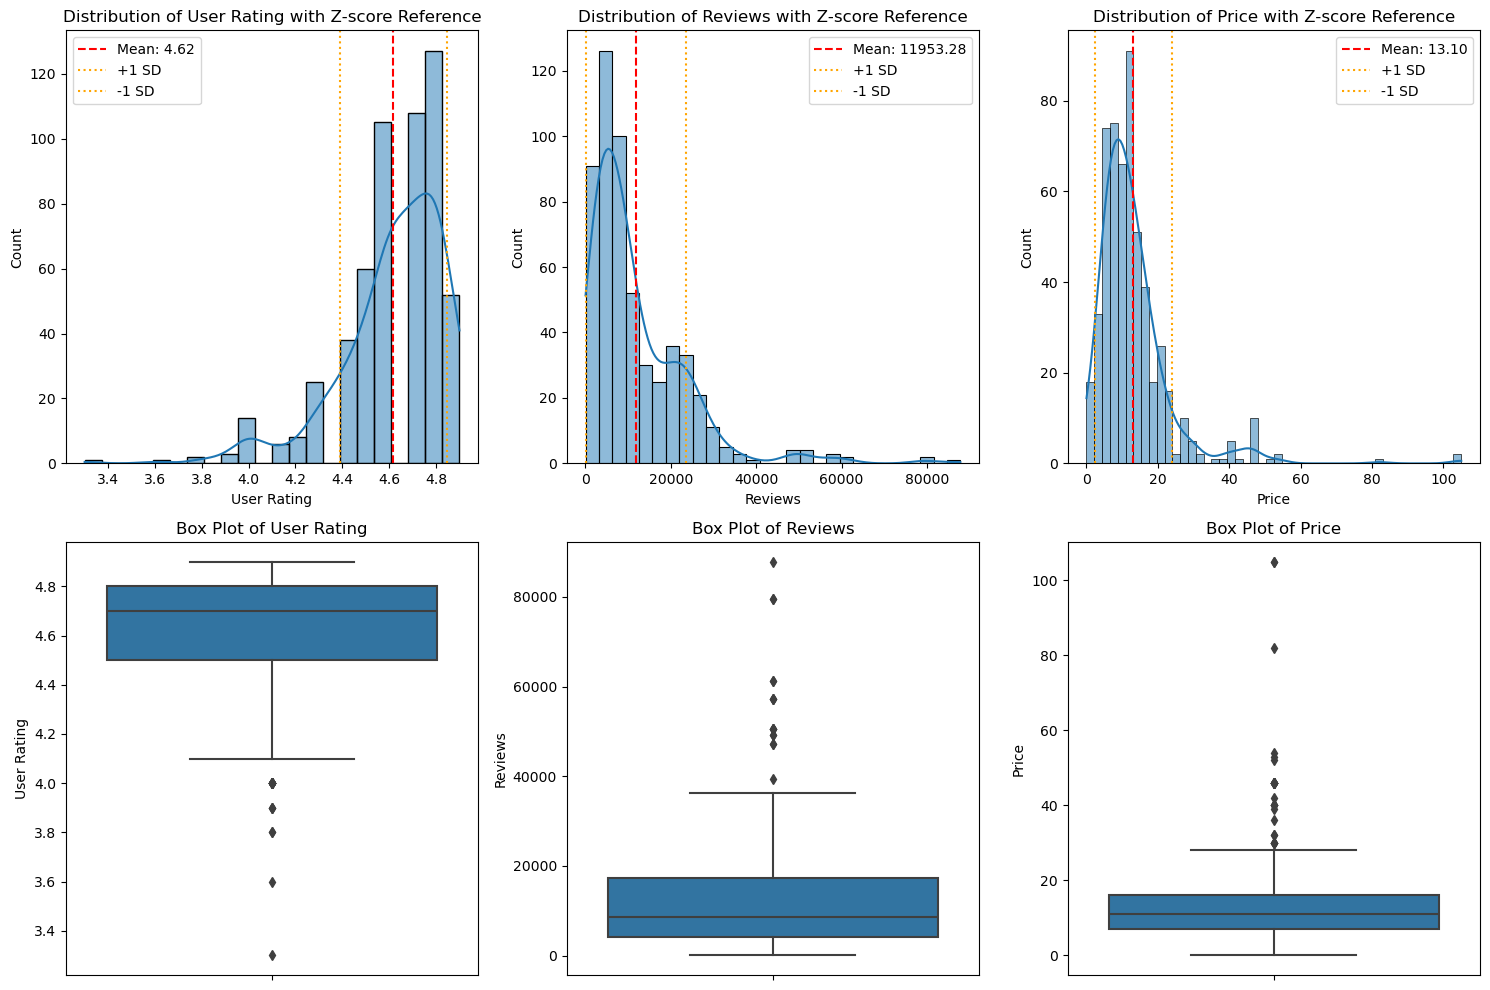


EXTREME Z-SCORE EXAMPLES (|z| > 2):

Books with extreme User Rating (|z-score| > 2):
                                                  Name             Author  \
182                                            Inferno          Dan Brown   
298  Shred: The Revolutionary Diet: 6 Weeks 4 Inche...  Ian K. Smith M.D.   
218                                Little Bee: A Novel       Chris Cleave   
383                              The Girl on the Train      Paula Hawkins   
363  The Dukan Diet: 2 Steps to Lose the Weight, 2 ...       Pierre Dukan   

     User Rating  User Rating_zscore  
182          4.1           -2.283738  
298          4.1           -2.283738  
218          4.1           -2.283738  
383          4.1           -2.283738  
363          4.1           -2.283738  

Books with extreme Reviews (|z-score| > 2):
                        Name          Author  Reviews  Reviews_zscore
534  Where the Crawdads Sing     Delia Owens    87841        6.468917
383    The Girl on the Train   P

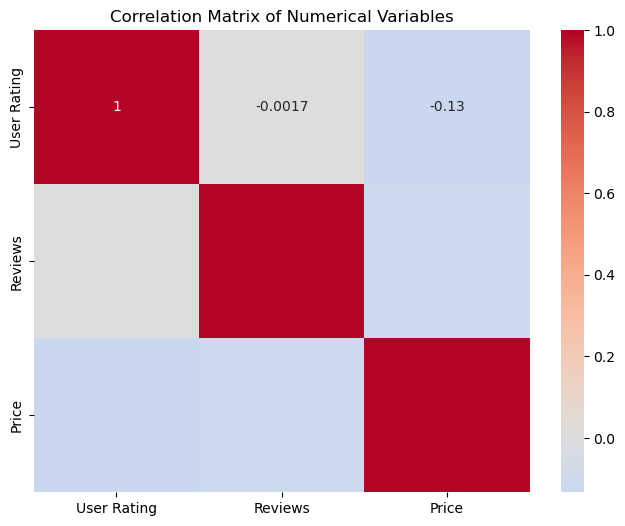

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('books.csv')

# Display basic info about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Calculate basic statistics for numerical columns
numerical_cols = ['User Rating', 'Reviews', 'Price']
stats_df = df[numerical_cols].describe()

# Add z-scores for each numerical column
for col in numerical_cols:
    df[f'{col}_zscore'] = (df[col] - df[col].mean()) / df[col].std()

# Create frequency tables with statistics
frequency_tables = {}

for col in numerical_cols:
    # Create frequency table
    freq_table = df[col].value_counts().sort_index().reset_index()
    freq_table.columns = [col, 'Frequency']
    
    # Add cumulative frequency
    freq_table['Cumulative Frequency'] = freq_table['Frequency'].cumsum()
    
    # Add percentage
    total = freq_table['Frequency'].sum()
    freq_table['Percentage'] = (freq_table['Frequency'] / total) * 100
    freq_table['Cumulative Percentage'] = freq_table['Percentage'].cumsum()
    
    frequency_tables[col] = freq_table
    
    print(f"\nFrequency Table for {col}:")
    print(freq_table.head(10))  # Show first 10 rows

# Display overall statistics
print("\n" + "="*50)
print("OVERALL STATISTICS:")
print("="*50)

for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.3f}")
    print(f"  Median: {df[col].median():.3f}")
    print(f"  Standard Deviation: {df[col].std():.3f}")
    print(f"  Min: {df[col].min():.3f}")
    print(f"  Max: {df[col].max():.3f}")
    print(f"  Range: {df[col].max() - df[col].min():.3f}")

# Create visualizations
plt.figure(figsize=(15, 10))

# 1. Distribution plots with z-score reference lines
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    plt.axvline(df[col].mean() + df[col].std(), color='orange', linestyle=':', label='+1 SD')
    plt.axvline(df[col].mean() - df[col].std(), color='orange', linestyle=':', label='-1 SD')
    plt.title(f'Distribution of {col} with Z-score Reference')
    plt.legend()

# 2. Box plots to show outliers
for i, col in enumerate(numerical_cols, 4):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

# Show examples of extreme z-scores
print("\n" + "="*50)
print("EXTREME Z-SCORE EXAMPLES (|z| > 2):")
print("="*50)

for col in numerical_cols:
    extreme_z = df[df[f'{col}_zscore'].abs() > 2]
    if not extreme_z.empty:
        print(f"\nBooks with extreme {col} (|z-score| > 2):")
        print(extreme_z[['Name', 'Author', col, f'{col}_zscore']].sort_values(f'{col}_zscore', ascending=False).head())
    else:
        print(f"\nNo books with extreme {col} values (|z-score| > 2)")

# Additional analysis: Correlation matrix
print("\n" + "="*50)
print("CORRELATION MATRIX:")
print("="*50)
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()
#I don't know how to remove the big red bar of code

This is all observational data that was collected by Sonia Spidnt. The most popular book in the last 10 years is Green Smoothie Cleanse.